Rayleigh distribution is probability distribution for continuous random variable. This distribution applied when the population is skewed. 

The probability distribution function for rayleigh distribution is given by:

$$P(X = x) = \frac{x}{\sigma^2} e^{- \frac{x^2}{2\sigma^2}}$$

where, $\sigma$ is mode value, also the natural parameter of rayleigh distribution.<br>
$x$ is the random variable

So, here we have to find the estimation function of natural parameter $\sigma$.

So, now i have to import the neccessary libraries to take input, plotting and output

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Here, i am going to find the best estimator for the natural parameters of poisson distribution. 

I am using **Maximum Likelihood Estimation** function to estimate the natural parameter.

Steps to find maximum likeliood function for any Probability Distribution. 
- We assume that we took a sample from particular probability distributed population with some unknown natural paramters. 
- We are also assuming that sample has n observation which are IID(Independent & Identically distributed)
<br><br>

According to the IID assumption:
So, after assuming Identically Distributed we will get:
$$L(P(X = x)) = P(X = x_1 \cap X = x_2\cap ... \cap X = x_n)$$ 
After assuming Independently distributed we will get:
$$L(P(X = x)) = P(X = x_1) . P(X = x_2) . .... . P(X = x_n)$$

On the basis of the assumption i am going to solve for natural parameter.


Let's expand the formula. 

$$L(\hat{\sigma}) = \frac{x_1}{\sigma^2} e^{- \frac{x_1^2}{2\sigma^2}}  \frac{x_2}{\sigma^2} e^{- \frac{x_2^2}{2\sigma^2}} ... \frac{x_N}{\sigma^2} e^{- \frac{x_N^2}{2\sigma^2}}$$

$$L(\hat{\sigma}) = \frac{\Sigma_{i = 1}^{N}x_i}{\sigma^2} e^{- N \frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} }$$

Applying $log_e$
$$log_e{L(\hat{\sigma})} = log_e\bigg(\Pi_{i = 1}^{N}x_i{\frac{1}{\sigma^2} e^{-\frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} }}\bigg)$$


$$log_e{L(\hat{\sigma})} = log_e\bigg(\Pi_{i = 1}^{N}x_i{\frac{1}{\sigma^2}\bigg)} + log_e{\bigg(e^{- \frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} }}\bigg)$$

$$log_e{L(\hat{\sigma})} = log_e\big(\Pi_{i = 1}^{N}x_i\big) + log_e{\big({\frac{1}{\sigma^2}\big)}} - {\frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} } $$

$$log_e{L(\hat{\sigma})} = \Sigma_{i = 1}^{N}log_e{x_i} - 2N log_e{\sigma} - {\frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} } $$

applying negative sign

$$- log_e{L(\hat{\sigma})} = -\Sigma_{i = 1}^{N}log_e{x_i} + 2N log_e{\sigma} + {\frac{\Sigma_{i=1}^{N} {x_i}^2}{2\sigma^2} } $$

applying $\partial$ differentition with respect to $\sigma$

$$\frac{\partial}{\partial\sigma} \big[- log_e{L(\hat{\sigma})}\big] = 0 + \frac{2N}{\sigma} - \frac{\Sigma_{i = 1}^{N} x^2}{\sigma^3} $$

after solving it, we will get

$$\hat{\sigma}_{ML} = \sqrt{\frac{\Sigma_{i = 1}^{N} x^2_i}{2N}}$$

Now, let's estimate the population mode value using sampling distribution. 

In [3]:
## Initializing population 
mode_val = 30
pop_size = 10000

In [4]:
# Taking population
population = np.random.rayleigh(scale = mode_val, size = pop_size)

(array([ 400.,  969., 1445., 1645., 1548., 1290., 1034.,  686.,  470.,
         245.,  134.,   67.,   44.,   14.,    9.]),
 array([  0.48271276,   8.5341416 ,  16.58557045,  24.6369993 ,
         32.68842815,  40.739857  ,  48.79128584,  56.84271469,
         64.89414354,  72.94557239,  80.99700124,  89.04843009,
         97.09985893, 105.15128778, 113.20271663, 121.25414548]),
 <a list of 15 Patch objects>)

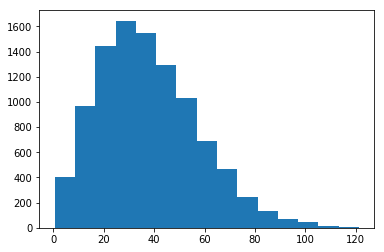

In [5]:
# Plotting population values
plt.hist(population, bins = 15)

Choosing random sample from the population using numpy function

In [6]:
sample_size = 20
total_sample = 100
samples = np.random.choice(population, size = (total_sample, sample_size))

In [7]:
## Showing samples which extracted from samples
samples

array([[32.43535878, 23.84268887, 17.95178373, ..., 87.59963387,
        46.82160349, 48.98490231],
       [31.83065308, 16.96673003, 37.00075377, ..., 61.55541178,
        45.177331  , 11.29214194],
       [47.59962163, 49.04452509, 36.33936327, ..., 44.35345508,
        22.15699705, 29.08423861],
       ...,
       [12.45072419, 65.67888958, 48.75539938, ..., 20.5556957 ,
        65.67888958, 41.85968968],
       [31.69262022, 18.93698722, 15.36052874, ..., 11.2743383 ,
        45.43085952, 61.69135779],
       [18.98163737, 88.4313158 , 32.15357098, ..., 35.3338378 ,
        71.8887587 , 23.24827103]])

In [21]:
# Calculating the value of individual sample using our estimator

## Creating a lambda function for the estimator
mode_estimator = lambda x: np.sqrt((np.sum(x**2)) / (2 * x.shape[0]))
sample_mode = np.apply_along_axis(mode_estimator, arr = samples, axis = 1)
sample_mode

array([28.68301869, 32.14392026, 29.35280969, 38.27356269, 30.52920935,
       26.1014255 , 27.11466364, 29.82010125, 24.70583427, 33.41747074,
       26.18192493, 34.38328786, 28.0203077 , 28.27240228, 35.04745084,
       30.75542533, 42.23773349, 30.51050844, 26.98406144, 32.31927827,
       30.92673838, 31.70512656, 36.55208556, 31.96360347, 26.50083412,
       28.94398053, 24.62428847, 30.4591871 , 27.48786522, 27.06966599,
       38.66849533, 30.11892323, 29.46017245, 30.52385341, 34.1934934 ,
       29.04492959, 34.50914711, 30.62594902, 32.35004383, 34.97460689,
       31.12798643, 28.2091372 , 25.76795446, 35.50684214, 30.38946472,
       32.1281866 , 33.79287834, 27.7801059 , 35.72423353, 23.1545742 ,
       33.43238204, 34.04188072, 30.50603703, 34.47718876, 29.54907752,
       28.61162619, 34.96124351, 29.59535574, 32.17949835, 31.88588983,
       26.89973809, 28.70486405, 30.1397143 , 31.02839177, 30.0681753 ,
       32.78200689, 29.29768246, 35.41785599, 28.8268089 , 32.66

(array([ 4., 10., 16., 25., 19., 15.,  7.,  2.,  1.,  1.]),
 array([23.1545742 , 25.06289013, 26.97120606, 28.87952199, 30.78783792,
        32.69615385, 34.60446978, 36.5127857 , 38.42110163, 40.32941756,
        42.23773349]),
 <a list of 10 Patch objects>)

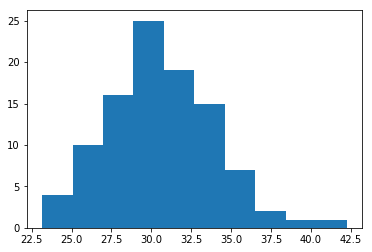

In [22]:
## Plotting the histogram for sample means
plt.hist(sample_mode)

In [23]:
## Taking the mean of all sample means
best_mode_estimate = np.mean(sample_mode)
print ('Best estimated value for natural parameter of rayleigh distribution: %.2f'%best_mode_estimate)

Best estimated value for natural parameter of rayleigh distribution: 30.73


In [24]:
bias = mode_val - best_mode_estimate
print ('Error between real value and estimated value %.2f'%bias)

Error between real value and estimated value -0.73
